## Classifying Handwritten numbers 

### Imports

In [37]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.6.0


### Load data

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 1s 0us/step


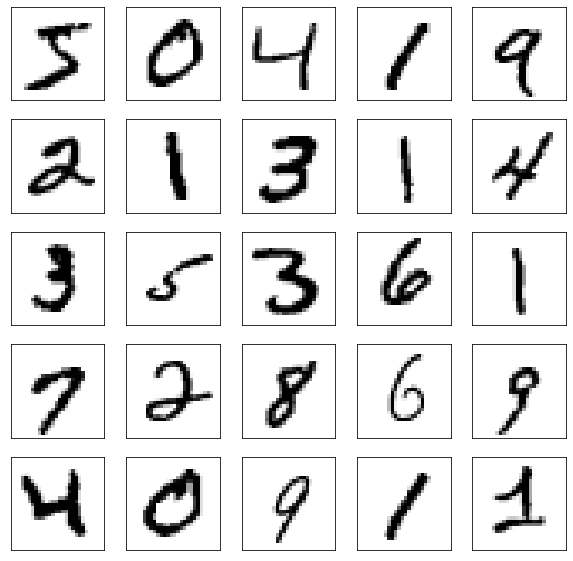

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

### Build model

In [28]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [29]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train Model

In [31]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0663 - accuracy: 0.9786
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0599 - accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0549 - accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0505 - accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0458 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0436 - accuracy: 0.9857
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0394 - accuracy: 0.9870
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0366 - accuracy: 0.9879
Epoch 9/10
1875/1875 [==============================] - 2s 950us/step - loss: 0.0347 - accuracy: 0.9883
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0

In [32]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0798 - accuracy: 0.9779


[0.0797719657421112, 0.9779000282287598]

In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

### Evaluate

In [34]:
predictions = probability_model.predict(x_test)

In [41]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

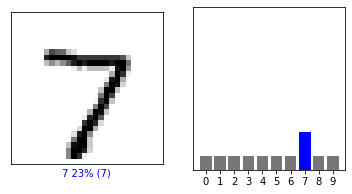

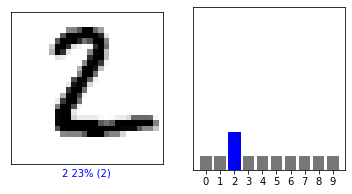

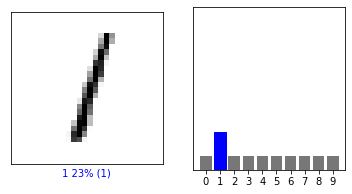

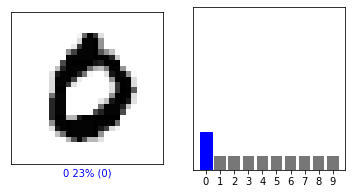

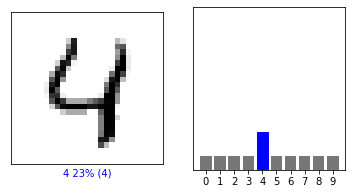

In [45]:
for i in range(5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  y_test)
    plt.show()